# Second notebook - Data diabetes

### imports

In [46]:
import dect_function
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import tables
import pandas as pd


### Part 1
### Boot Algorithms Detection of anomalies and 
### Running the algorithms


In [47]:

algos = [LocalOutlierFactor(n_neighbors=20, algorithm="auto", leaf_size=30, metric="minkowski", p=2, metric_params=None, contamination=0.18, novelty=False, n_jobs=None),
    EllipticEnvelope( store_precision=True, assume_centered=False, support_fraction=None, contamination=0.06, random_state=1),
    OneClassSVM(kernel="rbf", degree=2, gamma="scale", coef0=0, tol=0.02, nu=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1),
    IsolationForest(n_estimators=200, max_samples="auto", contamination=0.2, max_features=2, bootstrap=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)]

path = "../data_sets/diabetes.csv"
df = pd.read_csv(path)

# df['Species'] = df['Species'].map({'Bream': 1, 'Whitefish':2,'Parkki':3,'Perch':4,'Pike':5,'Smelt':6})

# print(np.isnan(df.any())) #and gets False
# print(np.isfinite(df.all())) #and gets True
df = dect_function.clean_dataset(df)

acc = dect_function.improvement_test_regression(df,algos)
for ac in acc:
    print(ac)
    


{'mean_squared_error': 0.48865878607217905, 'mean_absolute_error': 0.520748571582396}
{'mean_squared_error': 0.44480110900457515, 'mean_absolute_error': 0.5178476707452911}
{'mean_squared_error': 0.47482023330431117, 'mean_absolute_error': 0.5237791701739433}
{'mean_squared_error': 0.45781854860564525, 'mean_absolute_error': 0.5105412434789427}
{'mean_squared_error': 0.45478577179051755, 'mean_absolute_error': 0.5295460046263983}


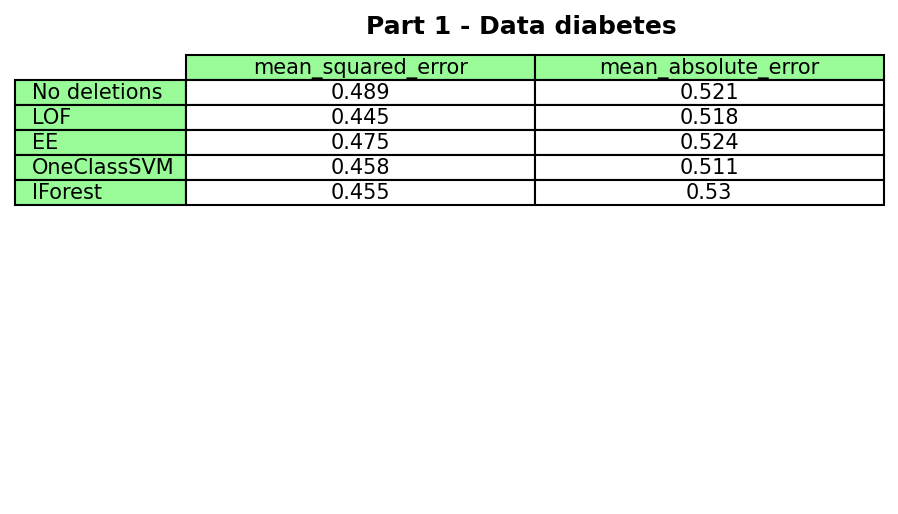

In [48]:
tables.algo_alone(acc ,"Part 1 - Data diabetes")


### Part 2
### 4 experiments of combinations

In [49]:
acc2 = dect_function.delete_all(df,[algos[0],algos[3]])
# acc2 = dect_function.delete_all(df,[algos[0],algos[1],algos[3],algos[2]])
print(acc2)
#[algos[0],algos[1],algos[3],algos[2]]


{'mean_squared_error': 0.4776975022721643, 'mean_absolute_error': 0.5357704803068227}


In [50]:
acc3 = dect_function.Add_and_delete(df,[algos[0],algos[3]])
print(acc3)

{'mean_squared_error': 0.420229749828069, 'mean_absolute_error': 0.511774614726914}


In [51]:

acc4 = dect_function.uniformy_average(df,[algos[2],algos[3]])
print(acc4)



{'mean_squared_error': 0.5435139002267468, 'mean_absolute_error': 0.5226180398580663}


In [52]:

algos2 = [algos[2],algos[3]]
ratio = [0.5,0.25,0.25]

acc5 = dect_function.ratio_average(df,algos2,ratio,10)
print(acc5)

{'mean_squared_error': 0.527517569922592, 'mean_absolute_error': 0.523926695762429}


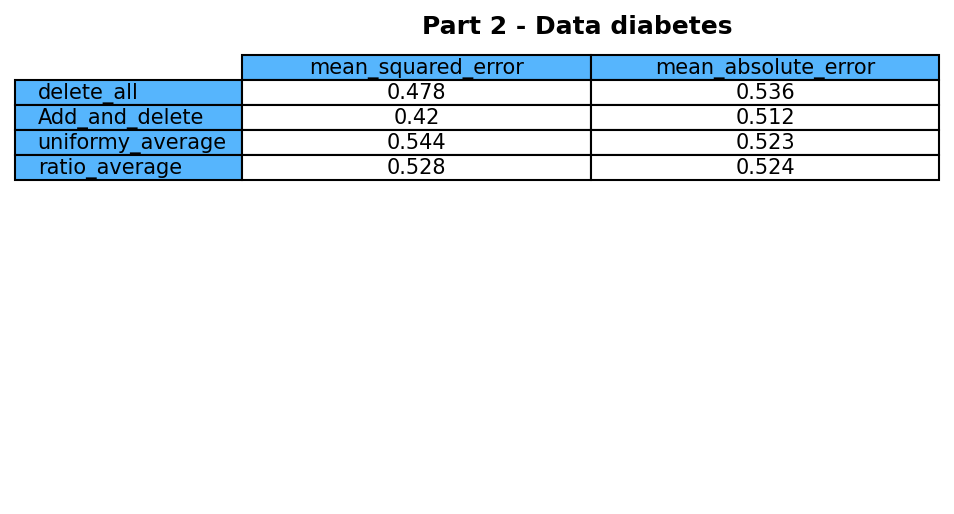

In [53]:
val2 = ["delete_all","Add_and_delete","uniformy_average","ratio_average"]
list_acc = [acc2,acc3,acc4,acc5]

tables.part2(list_acc,"Part 2 - Data diabetes",val2)

### Part 3

In [54]:

best_result = acc[0].copy()
dd = dect_function.combination(df,algos,best_result)
acc.append(best_result)
for a in acc:
    print(a)
print(best_result)
print(dd)


{'mean_squared_error': 0.48865878607217905, 'mean_absolute_error': 0.520748571582396}
{'mean_squared_error': 0.44480110900457515, 'mean_absolute_error': 0.5178476707452911}
{'mean_squared_error': 0.47482023330431117, 'mean_absolute_error': 0.5237791701739433}
{'mean_squared_error': 0.45781854860564525, 'mean_absolute_error': 0.5105412434789427}
{'mean_squared_error': 0.45478577179051755, 'mean_absolute_error': 0.5295460046263983}
{'mean_squared_error': 0.43241369123549456, 'mean_absolute_error': 0.5104047877103113}
{'mean_squared_error': 0.43241369123549456, 'mean_absolute_error': 0.5104047877103113}
{'mean_squared_error': array([ 1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1]), 'mean_absolute_error': array([ 1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1]), 'result_best': {'mean_squared_error': 0.43241369123549456, 'mean_absolute_error': 0.510404

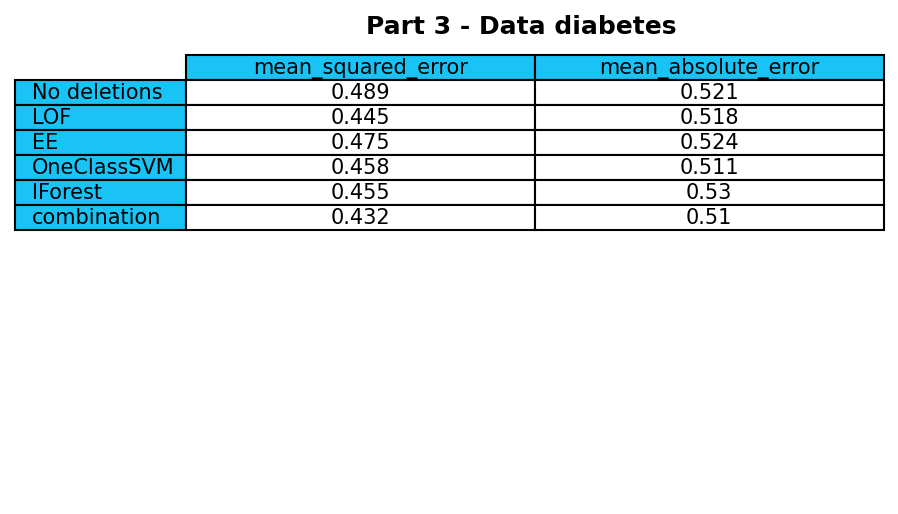

In [55]:
tables.algo_combination(acc,"Part 3 - Data diabetes")